![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### Analisis explotario de las ligas europeas de fútbol.

In [2]:
#Escribe el título del proyecto en Markdown

### El analisis consiste en descubrir tendencias sobre goles, en las distintas ligas europeas de fútbol.

In [3]:
# Describe brevemente el tema del proyecto en Markdown

### HIPÓTESIS

La hipótesis partirá, de que las ligas europeas con más nivel, son las que encajan menos goles en general.

In [4]:
# Escribe tu hipótesis principal en Markdown

In [5]:
# Escribe más hipótesis si las hubiera en Markdown

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

El dataset consiste en una gran base de datos de las once ligas europeas, incluyendo partidos, jugadores y sus atributos.<br>
Se ha obtenido de Kaggle
https://www.kaggle.com/hugomathien/soccer

In [6]:
# describe la fuente de tus datos e incluye los links en Markdown

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [20]:
import pandas as pd
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
con = sqlite3.connect("database.sqlite")
country = pd.read_sql_query("SELECT * from Country", con)

# Verify that result of SQL query is stored in the dataframe
country.head(25)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [9]:
con = sqlite3.connect("database.sqlite")
league = pd.read_sql_query("SELECT * from League", con)
league.head(25)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [10]:
data_1 = pd.DataFrame.merge(country,league, on='id',how='outer')
data_1.rename(columns={'name_x':'Country', 'name_y':'League'})

,id,Country,country_id,League
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


In [11]:
con = sqlite3.connect("database.sqlite")
team = pd.read_sql_query("SELECT * from Team", con)
team.head(24)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [12]:
con = sqlite3.connect("database.sqlite")
matches = pd.read_sql_query("SELECT * from Match", con)
matches.head(50)

matches_clean = matches[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
Total_Goals = matches_clean['home_team_goal']+matches_clean['away_team_goal']
matches_clean['Total Goals']=Total_Goals
matches_clean.head()

C:\Users\Héctor\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Total Goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,4


In [13]:
data_2 = pd.DataFrame.merge(data_1,matches_clean, on='country_id',how='outer')
data_2.head()

,id_x,name_x,country_id,name_y,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Total Goals
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,2
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,3
3,1,Belgium,1,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5
4,1,Belgium,1,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,4


In [31]:
data_2[data_2['season']=='2009/2010'].groupby('name_x')[['Total Goals',]].mean().sort_values(['Total Goals'],ascending = False)


,Total Goals
name_x,
Switzerland,3.327778
Netherlands,2.915033
Germany,2.830065
England,2.771053
Spain,2.713158
Belgium,2.690476
Italy,2.610526
Scotland,2.565789
Portugal,2.504167


In [104]:

con = sqlite3.connect("database.sqlite")
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
team_attributes.head(24)
data_final = pd.DataFrame.merge(team_attributes,data_2,on='team_api_id',how='outer')




KeyError: 'team_api_id'

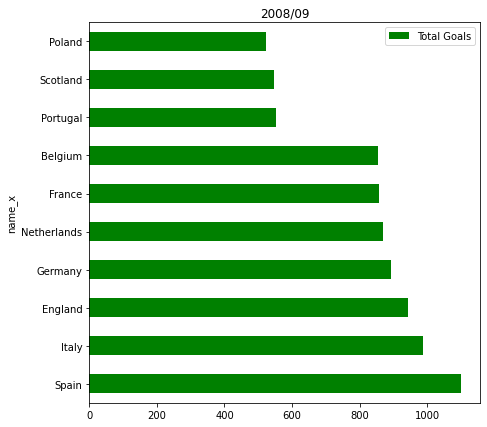

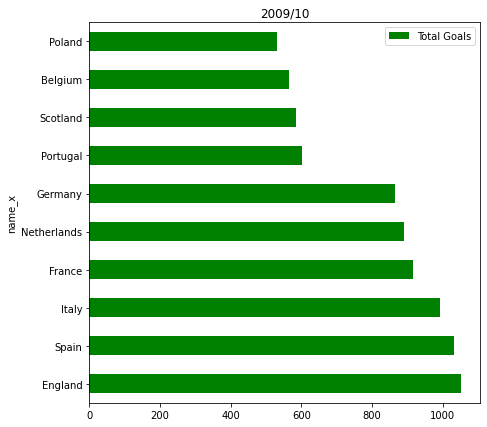

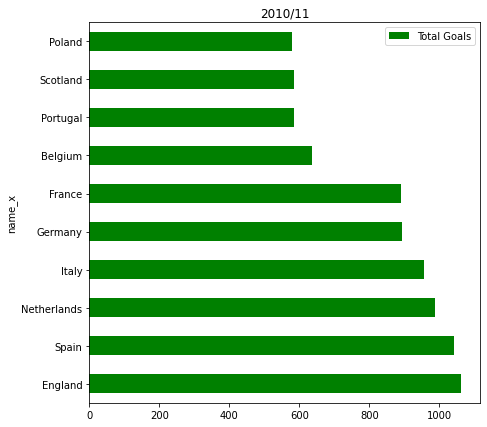

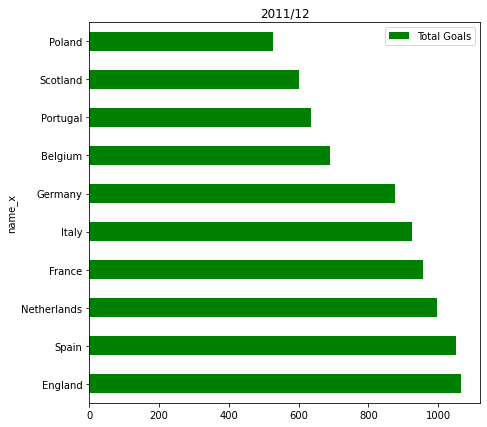

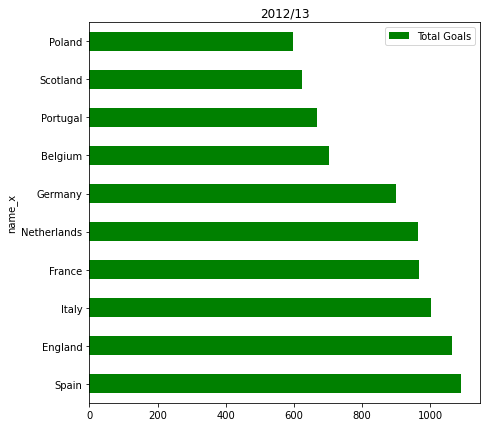

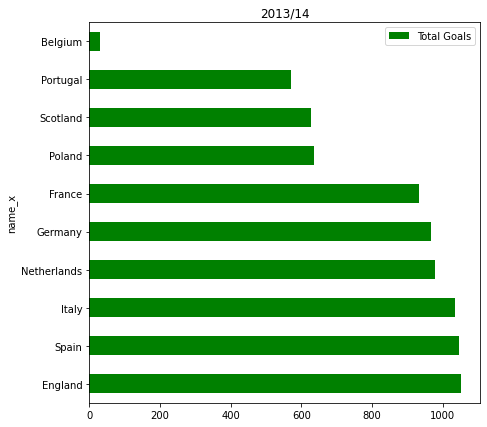

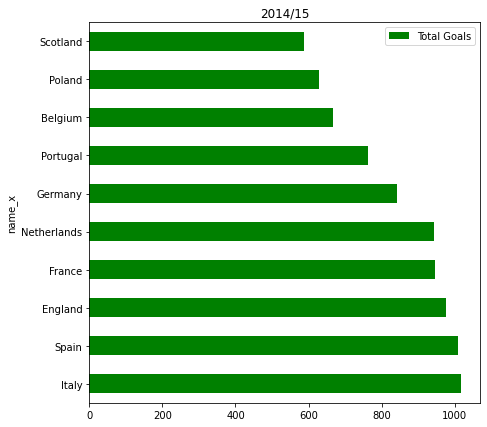

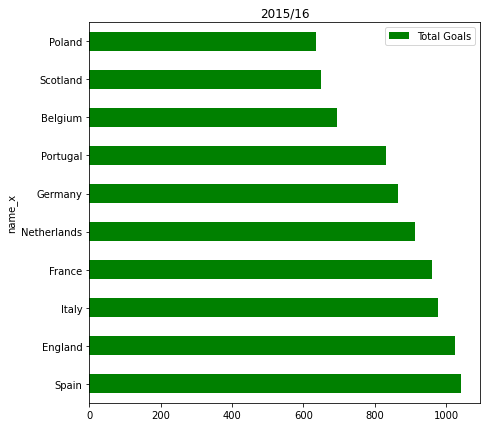

In [65]:
#Graficos goles totales por temporada
data_2[data_2['season']=='2008/2009'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2008/09',figsize=(7,7)).figure.savefig('eda.png')
data_2[data_2['season']=='2009/2010'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2009/10',figsize=(7,7)).figure.savefig('1.png')
data_2[data_2['season']=='2010/2011'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2010/11',figsize=(7,7)).figure.savefig('2.png')
data_2[data_2['season']=='2011/2012'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2011/12',figsize=(7,7)).figure.savefig('3.png')
data_2[data_2['season']=='2012/2013'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2012/13',figsize=(7,7)).figure.savefig('4.png')
data_2[data_2['season']=='2013/2014'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2013/14',figsize=(7,7)).figure.savefig('4.png')
data_2[data_2['season']=='2014/2015'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2014/15',figsize=(7,7)).figure.savefig('5.png')
data_2[data_2['season']=='2015/2016'].groupby(['name_x'])[['Total Goals']].sum().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='barh',color='Green',title='2015/16',figsize=(7,7)).figure.savefig('eda.png')

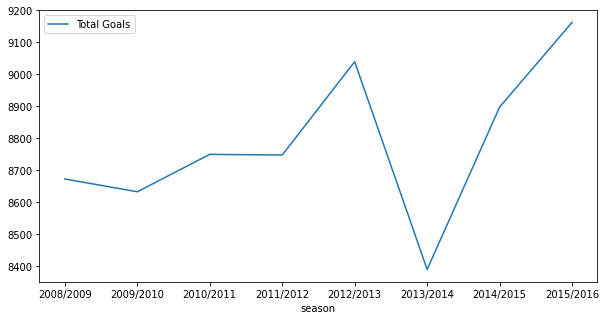

In [82]:
#Tendencia de goles
data_2.groupby(['season'])[['Total Goals']].sum().head(10).plot(figsize=(10,5)).figure.savefig('tendencia goles.png')

<AxesSubplot:xlabel='name_x'>

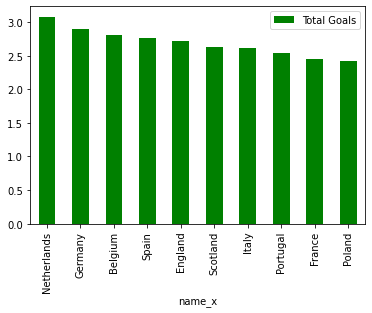

In [87]:
#Media de goles
data_2.groupby(['name_x'])[['Total Goals']].mean().head(10).sort_values(['Total Goals'],ascending=False).plot(kind='bar',color='Green')

In [96]:
con = sqlite3.connect("database.sqlite")
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
team_attributes.head(24)
data_final = pd.DataFrame.merge(data,data_2,on='country_id',how='outer')
data_final = data.drop(columns = ['team_fifa_api_id','team_api_id','date_x','buildUpPlaySpeed','buildUpPlaySpeedClass','buildUpPlayDribbling','buildUpPlayDribblingClass','buildUpPlayPassing'])
data_final = data.drop(columns = ['buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass'])
data_final = data.drop(columns= ['defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass','match_api_id','home_team_api_id','away_team_api_id'])

data_final.head()


KeyError: "['team_fifa_api_id' 'team_api_id' 'date_x' 'buildUpPlaySpeed'\n 'buildUpPlaySpeedClass' 'buildUpPlayDribbling'\n 'buildUpPlayDribblingClass' 'buildUpPlayPassing'] not found in axis"

In [95]:
data.groupby(['country_id'])[['chanceCreationShooting']].mean().head(10)

,chanceCreationShooting
country_id,
1,53.969136
1729,NaN
4769,NaN
7809,NaN
10257,NaN
13274,NaN
15722,NaN
17642,NaN
19694,NaN
